# kramer2.0 Experiment 01: Figures
## Angelique I. Delarazan
### kramer2.0_experiment_01_vB5
### Retrieval Tasks: Character-Cued Recall and Event Distance Task

## Set Up

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import itertools
import ptitprince as pt


## Character-Cued Recall

In [2]:
recall = pd.read_csv('~/Box Sync/aidelarazan_box/Projects/kramer2.0/data/kramer2.0_vB5/kramer2.0_vB5_sub-all_desc-recall.csv')
recall['condition'] = recall['coherence'] + '_' + recall['lag']
print(recall.columns.tolist())
recall.head()

['subject', 'version', 'character', 'coherence', 'lag', 'plot', 'response', 'rt', 'word_count', 'condition']


,subject,version,character,coherence,lag,plot,response,rt,word_count,condition
0,301,6,Melvin,unrelated,long,sideplot,"{""Q0"":""Melvin needed a recipe from his grandma...",189901.7,71,unrelated_long
1,301,6,Beatrice,coherent,short,sideplot,"{""Q0"":""Fist, she asked Charles to chose betwee...",293047.3,73,coherent_short
2,301,6,Johnny,coherent,long,sideplot,"{""Q0"":""Johnny called Charles to tell him about...",181397.2,39,coherent_long
3,301,6,Sandra,unrelated,short,sideplot,"{""Q0"":""Sandra first asked for Charles opinion ...",181062.9,89,unrelated_short
4,301,6,Charles,mainplot,mainplot,mainplot,"{""Q0"":""Charles was wearing a beige sport coat ...",442870.5,226,mainplot_mainplot


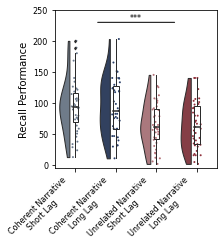

In [10]:
fig, ax = plt.subplots(figsize=(2.9, 2.9), facecolor='none')

xtick_order = ['coherent_short', 'coherent_long', 'unrelated_short', 'unrelated_long']
xtick_labels = {
    'coherent_short': 'Coherent Narrative\nShort Lag         ',
    'coherent_long': 'Coherent Narrative\nLong Lag         ',
    'unrelated_short': 'Unrelated Narrative\nShort Lag         ',
    'unrelated_long': 'Unrelated Narrative\nLong Lag         '
}
xtick_colors = {
    'coherent_short': '#6b7a8d',
    'coherent_long': '#2a3f67',
    'unrelated_short': '#b27077',
    'unrelated_long': '#91323d'
}

ax=pt.half_violinplot( 
    data=recall[recall['coherence']!='mainplot'], 
    x='condition', 
    y='word_count', 
    hue='condition',
    hue_order=xtick_order,
    palette = xtick_colors, 
    bw = .5, 
    cut = 0.,
    scale = "area", 
    width = .5, 
    inner = None,
    order = xtick_order, 
    split=True,
    linewidth=1,
    # orient = ort
    )

ax=sns.boxplot( 
    data=recall[recall['coherence']!='mainplot'], 
    x='condition', 
    y='word_count', 
    palette = xtick_colors, 
    width = .14, 
    order = xtick_order,
    fliersize=2,
    zorder = 10,\
            showcaps = False, boxprops = {'facecolor':'none', "zorder":10, 'linewidth':1},\
            showfliers=True, whiskerprops = {'linewidth':1, "zorder":10},\
            #    saturation = 1, orient = ort
               )

ax=sns.stripplot( 
    data=recall[recall['coherence']!='mainplot'], 
    x='condition', 
    y='word_count', 
    palette = xtick_colors, 
    edgecolor = "white",
    size = 2, 
    jitter = 1, 
    zorder = 0,
    order = xtick_order,
    # orient = ort
    )

ax.set_ylabel('Recall Performance')
ax.set_xlabel('')
ax.set_xticks(range(len(xtick_order)))
ax.set_xticklabels([xtick_labels[label] for label in xtick_order], rotation=45, ha='right')

xy = (0.5, 230)
xytext = (2.5, 230)
center = ((xy[0] + xytext[0]) / 2, (xy[1] + xytext[1]) / 2)

ax.annotate('', xy=xy, xytext=xytext, arrowprops=dict(arrowstyle='-', color='black'))
ax.text(center[0], center[1] + 15, '***', ha='center', va='top', fontsize=8)
ax.set_ylim(-5, 250)  
ax.tick_params(labelsize=8)
ax.legend_.remove()

# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_03.09.2024/kramer2.0_vB5_recall_performance_vertical_raincloud.png', dpi=300, bbox_inches='tight')

## Event Distance Task

In [4]:
distance = pd.read_csv('~/Box Sync/aidelarazan_box/Projects/kramer2.0/data/kramer2.0_vB5/kramer2.0_vB5_sub-all_desc-distance.csv')
distance['condition'] = distance['coherence'] + '_' + distance['lag']
print(distance.columns.tolist())
distance.head()

['subject', 'version', 'character_1', 'act_1', 'event_1', 'image_1', 'position_1', 'character_2', 'act_2', 'event_2', 'image_2', 'position_2', 'coherence', 'lag', 'plot', 'response', 'correct_distance', 'rt', 'stimulus', 'condition', 'trial_index', 'error', 'abs_error']


,subject,version,character_1,act_1,event_1,image_1,position_1,character_2,act_2,event_2,...,lag,plot,response,correct_distance,rt,stimulus,condition,trial_index,error,abs_error
0,301,6,Charles,1,E,3,67,Charles,2,A,...,mainplot,NaN,118,8,7400.5,"[""<img src=\""jspsych/stimuli/charles1E3.png\"" ...",mainplot_mainplot,25,110,110
1,301,6,Charles,1,B,2,18,Charles,1,B,...,mainplot,NaN,114,2,5674.9,"[""<img src=\""jspsych/stimuli/charles1B2.png\"" ...",mainplot_mainplot,26,112,112
2,301,6,Sandra,1,A,2,58,Sandra,2,B,...,short,NaN,101,42,7674.4,"[""<img src=\""jspsych/stimuli/sandra1A2.png\"" w...",unrelated_short,27,59,59
3,301,6,Johnny,1,A,7,31,Johnny,2,A,...,long,NaN,90,103,9193.8,"[""<img src=\""jspsych/stimuli/johnny1A7.png\"" w...",coherent_long,28,-13,13
4,301,6,Sandra,1,A,8,64,Sandra,2,B,...,short,NaN,87,34,9309.0,"[""<img src=\""jspsych/stimuli/sandra1A8.png\"" w...",unrelated_short,29,53,53


In [5]:
distance = distance[distance['coherence']!='mainplot'].groupby(['subject', 'coherence', 'lag', 'condition']).mean().reset_index()

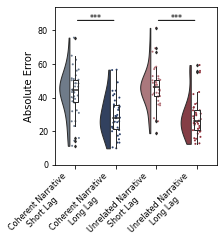

In [9]:
fig, ax = plt.subplots(figsize=(2.9, 2.9), facecolor='none')

xtick_order = ['coherent_short', 'coherent_long', 'unrelated_short', 'unrelated_long']
xtick_labels = {
    'coherent_short': 'Coherent Narrative\nShort Lag         ',
    'coherent_long': 'Coherent Narrative\nLong Lag         ',
    'unrelated_short': 'Unrelated Narrative\nShort Lag         ',
    'unrelated_long': 'Unrelated Narrative\nLong Lag         '
}
xtick_colors = {
    'coherent_short': '#6b7a8d',
    'coherent_long': '#2a3f67',
    'unrelated_short': '#b27077',
    'unrelated_long': '#91323d'
}

ax=pt.half_violinplot( 
    data=distance[distance['coherence']!='mainplot'], 
    x='condition', 
    y='abs_error', 
    hue='condition',
    hue_order=xtick_order,
    palette = xtick_colors, 
    bw = .5, 
    cut = 0.,
    scale = "area", 
    width = .5, 
    inner = None,
    order = xtick_order, 
    split=True,
    linewidth=1,
    # orient = ort
    )

ax=sns.boxplot( 
    data=distance[distance['coherence']!='mainplot'], 
    x='condition', 
    y='abs_error', 
    palette = xtick_colors, 
    width = .14, 
    order = xtick_order,
    fliersize=2,
    zorder = 10,\
            showcaps = False, boxprops = {'facecolor':'none', "zorder":10, 'linewidth':1},\
            showfliers=True, whiskerprops = {'linewidth':1, "zorder":10},\
            #    saturation = 1, orient = ort
               )

ax=sns.stripplot( 
    data=distance[distance['coherence']!='mainplot'], 
    x='condition', 
    y='abs_error', 
    palette = xtick_colors, 
    edgecolor = "white",
    size = 2, 
    jitter = 1, 
    zorder = 0,
    order = xtick_order,
    # orient = ort
    )

ax.set_ylabel('Absolute Error')
ax.set_xlabel('')
ax.set_xticks(range(len(xtick_order)))
ax.set_xticklabels([xtick_labels[label] for label in xtick_order], rotation=45, ha='right')

xy_A = (0, 86)
xytext_A = (1, 86)
center_A = ((xy_A[0] + xytext_A[0]) / 2, (xy_A[1] + xytext_A[1]) / 2)

ax.annotate('', xy=xy_A, xytext=xytext_A, arrowprops=dict(arrowstyle='-', color='black'))
ax.text(center_A[0], center_A[1] + 4, '***', ha='center', va='top', fontsize=8)

xy_B = (2, 86)
xytext_B = (3, 86)
center_B = ((xy_B[0] + xytext_B[0]) / 2, (xy_B[1] + xytext_B[1]) / 2)

ax.annotate('', xy=xy_B, xytext=xytext_B, arrowprops=dict(arrowstyle='-', color='black'))
ax.text(center_B[0], center_A[1] + 4, '***', ha='center', va='top', fontsize=8)

ax.set_ylim(0, 94)  
ax.tick_params(labelsize=8)
ax.legend_.remove()


# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_03.09.2024/kramer2.0_vB5_distance_task_abs_vertical_raincloud.png', dpi=300, bbox_inches='tight')

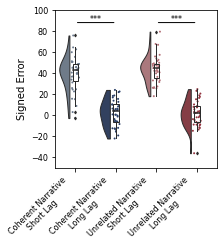

In [8]:
fig, ax = plt.subplots(figsize=(2.9, 2.9), facecolor='none')

xtick_order = ['coherent_short', 'coherent_long', 'unrelated_short', 'unrelated_long']
xtick_labels = {
    'coherent_short': 'Coherent Narrative\nShort Lag         ',
    'coherent_long': 'Coherent Narrative\nLong Lag         ',
    'unrelated_short': 'Unrelated Narrative\nShort Lag         ',
    'unrelated_long': 'Unrelated Narrative\nLong Lag         '
}
xtick_colors = {
    'coherent_short': '#6b7a8d',
    'coherent_long': '#2a3f67',
    'unrelated_short': '#b27077',
    'unrelated_long': '#91323d'
}

ax=pt.half_violinplot( 
    data=distance[distance['coherence']!='mainplot'], 
    x='condition', 
    y='error', 
    hue='condition',
    hue_order=xtick_order,
    palette = xtick_colors, 
    bw = .5, 
    cut = 0.,
    scale = "area", 
    width = .5, 
    inner = None,
    order = xtick_order, 
    split=True,
    linewidth=1,
    # orient = ort
    )

ax=sns.boxplot( 
    data=distance[distance['coherence']!='mainplot'], 
    x='condition', 
    y='error', 
    palette = xtick_colors, 
    width = .14, 
    order = xtick_order,
    fliersize=2,
    zorder = 10,\
            showcaps = False, boxprops = {'facecolor':'none', "zorder":10, 'linewidth':1},\
            showfliers=True, whiskerprops = {'linewidth':1, "zorder":10},\
            #    saturation = 1, orient = ort
               )

ax=sns.stripplot( 
    data=distance[distance['coherence']!='mainplot'], 
    x='condition', 
    y='error', 
    palette = xtick_colors, 
    edgecolor = "white",
    size = 2, 
    jitter = 1, 
    zorder = 0,
    order = xtick_order,
    # orient = ort
    )

ax.set_ylabel('Signed Error')
ax.set_xlabel('')
ax.set_xticks(range(len(xtick_order)))
ax.set_xticklabels([xtick_labels[label] for label in xtick_order], rotation=45, ha='right')

xy_A = (0, 88)
xytext_A = (1, 88)
center_A = ((xy_A[0] + xytext_A[0]) / 2, (xy_A[1] + xytext_A[1]) / 2)

ax.annotate('', xy=xy_A, xytext=xytext_A, arrowprops=dict(arrowstyle='-', color='black'))
ax.text(center_A[0], center_A[1] + 8, '***', ha='center', va='top', fontsize=8)

xy_B = (2, 88)
xytext_B = (3, 88)
center_B = ((xy_B[0] + xytext_B[0]) / 2, (xy_B[1] + xytext_B[1]) / 2)

ax.annotate('', xy=xy_B, xytext=xytext_B, arrowprops=dict(arrowstyle='-', color='black'))
ax.text(center_B[0], center_A[1] + 8, '***', ha='center', va='top', fontsize=8)
ax.set_ylim(-50, 100)  
ax.tick_params(labelsize=8)
ax.legend_.remove()


# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_03.09.2024/kramer2.0_vB5_distance_task_signed_vertical_raincloud.png', dpi=300, bbox_inches='tight')